## 7.1 集計と統計

In [31]:
import pandas as pd
import numpy as np
adams_act = pd.DataFrame(
                [
                  [12, 92],
                  [13, 65],
                  [14, 96]
                ],
                columns=['Date', 'Act'])
print(adams_act)

   Date  Act
0    12   92
1    13   65
2    14   96


In [32]:
# 各列で最小値が位置するインデックス
adams_act.idxmin()

Date    0
Act     1
dtype: int64

In [33]:
# 各行で最小値が位置するインデックス
adams_act.idxmin(axis=1)

0    Date
1    Date
2    Date
dtype: object

In [34]:
# 各列で最大値が位置するインデックス
adams_act.idxmax()

Date    2
Act     2
dtype: int64

In [6]:
adams_act.cummin()

   Date  Act
0    12   92
1    12   65
2    12   65

In [7]:
adams_act.cummax()

   Date  Act
0    12   92
1    13   92
2    14   96

In [8]:
adams_act.cumsum()

   Date  Act
0    12   92
1    25  157
2    39  253

In [9]:
adams_act.cumprod()

   Date     Act
0    12      92
1   156    5980
2  2184  574080

In [10]:
adams_act.diff()

   Date   Act
0   NaN   NaN
1   1.0 -27.0
2   1.0  31.0

In [11]:
adams_act.pct_change()

       Date       Act
0       NaN       NaN
1  0.083333 -0.293478
2  0.076923  0.476923

### 7.1.1 rolling, expanding メソッド

In [12]:
adams_act.expanding()

Expanding [min_periods=1,center=False,axis=0,method=single]

In [13]:
adams_act.expanding(1)

Expanding [min_periods=1,center=False,axis=0,method=single]

In [14]:
adams_act.expanding().sum()

   Date    Act
0  12.0   92.0
1  25.0  157.0
2  39.0  253.0

In [36]:
adams_act.expanding().mean()

   Date        Act
0  12.0  92.000000
1  12.5  78.500000
2  13.0  84.333333

In [37]:
adams_act.expanding(min_periods=3).sum()

   Date    Act
0   NaN    NaN
1   NaN    NaN
2  39.0  253.0

In [16]:
adams_act.expanding(3).sum()

   Date    Act
0   NaN    NaN
1   NaN    NaN
2  39.0  253.0

In [19]:
# 直前の1つと現在の値の合計を求める
adams_act.rolling(window=2).sum()

   Date    Act
0   NaN    NaN
1  25.0  157.0
2  27.0  161.0

In [20]:
# 直前の1つと現在の値の平均を求める
adams_act.rolling(window=2).mean()

   Date   Act
0   NaN   NaN
1  12.5  78.5
2  13.5  80.5

In [21]:
# 直前の2つと現在の値の合計を求める
adams_act.rolling(window=3).sum()

   Date    Act
0   NaN    NaN
1   NaN    NaN
2  39.0  253.0

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.notebook_repr_html', False)

# データの読み込む
df = pd.read_csv('data/kr_population.csv', index_col=0, parse_dates=True)
df[:15]

            population   birth   death  increments  birthrate
Year                                                         
1925-01-01    12997611  558897  359042      199855       6.59
1926-01-01    13052741  511667  337948      173719        NaN
1927-01-01    13037169  534524  353818      180706        NaN
1928-01-01    13105131  566142  357701      208441        NaN
1929-01-01    13124279  566969  414366      152603        NaN
1930-01-01    13880469  587144  322611      264533       6.41
1931-01-01    13895052  589428  346800      242628        NaN
1932-01-01    14117191  600545  384287      216258        NaN
1933-01-01    14229277  607021  336232      270789        NaN
1934-01-01    14449155  618135  356515      261620        NaN
1935-01-01    15061960  646158  377454      268704       6.60
1936-01-01    15114775  639355  381806      257549        NaN
1937-01-01    15235383  636839  342575      294264        NaN
1938-01-01    15358193  569299  347025      222274        NaN
1939-01-

In [28]:
df

            population   birth   death  increments  birthrate
Year                                                         
1925-01-01    12997611  558897  359042      199855      6.590
1926-01-01    13052741  511667  337948      173719        NaN
1927-01-01    13037169  534524  353818      180706        NaN
1928-01-01    13105131  566142  357701      208441        NaN
1929-01-01    13124279  566969  414366      152603        NaN
...                ...     ...     ...         ...        ...
2017-01-01    51361911  357771  285534       72237      1.052
2018-01-01    51585058  326822  298820       28002      0.977
2019-01-01    51764822  303054  295132        7922      0.918
2020-01-01    51836239  272337  304948      -32611      0.837
2021-01-01    51744876  260562  317680      -57118      0.808

[97 rows x 5 columns]

In [38]:
df['birth'].rolling(window=10).mean()[:15]

Year
1925-01-01         NaN
1926-01-01         NaN
1927-01-01         NaN
1928-01-01         NaN
1929-01-01         NaN
1930-01-01         NaN
1931-01-01         NaN
1932-01-01         NaN
1933-01-01         NaN
1934-01-01    574047.2
1935-01-01    582773.3
1936-01-01    595542.1
1937-01-01    605773.6
1938-01-01    606089.3
1939-01-01    607940.6
Name: birth, dtype: float64

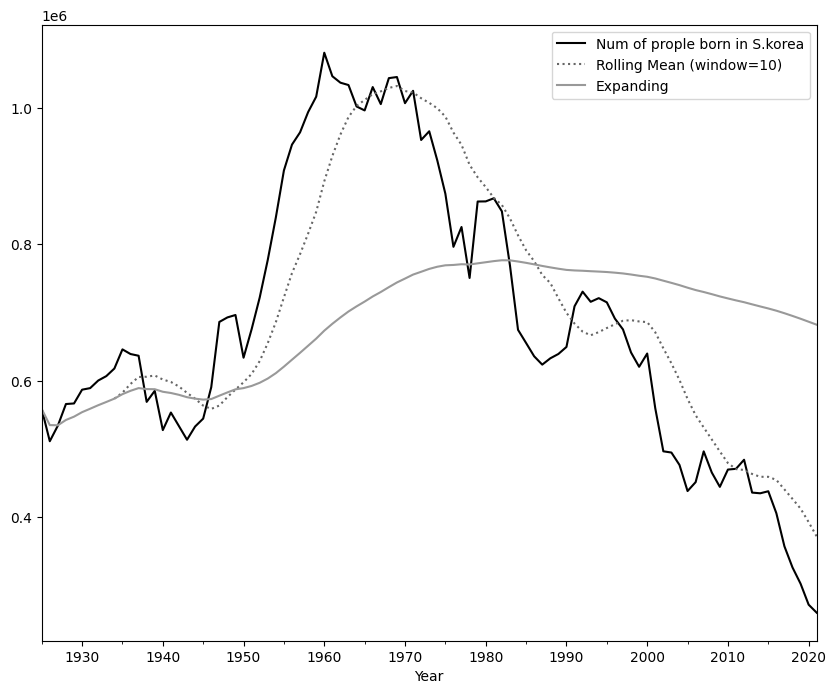

In [24]:
plt.style.use('grayscale')
plt.figure(facecolor='white')

# 年度別出生者数
df['birth'].plot(label='Num of prople born in S.korea',
                 linestyle='-', figsize=(10,8))

# 年度別出生者数を10年間移動平均し、滑らかにラインを描く
df['birth'].rolling(window=10).mean().plot(
  label='Rolling Mean (window=10)',linestyle=":")


# 累積平均を描く
df['birth'].expanding().mean().plot(label='Expanding', linestyle="-")
plt.legend()

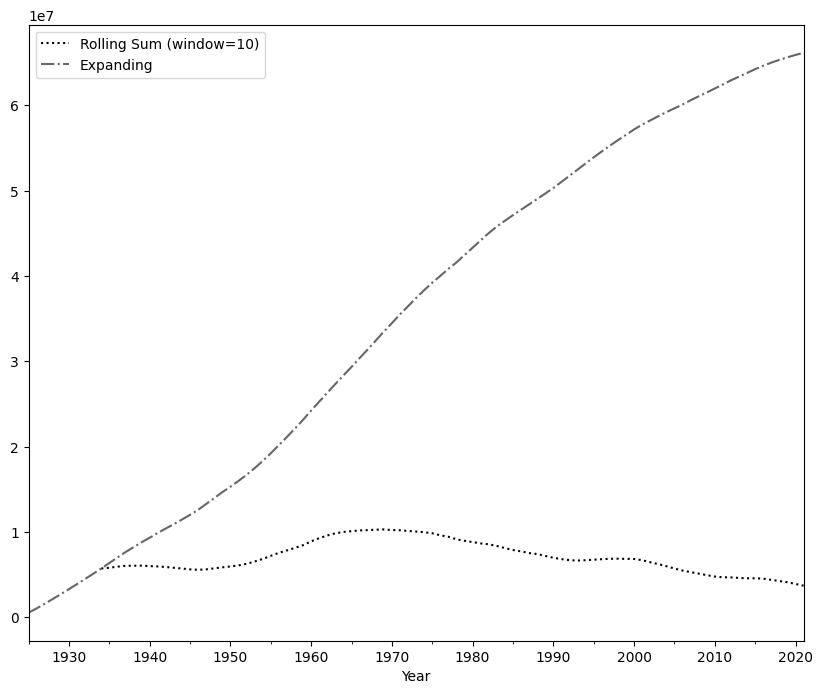

In [25]:
plt.style.use('grayscale')
plt.figure(facecolor='white')

# 10年間の累積出生数を計算
df['birth'].rolling(window=10).sum().plot(
  label='Rolling Sum (window=10)', linestyle=":", figsize=(10,8))

# 累積出生数を描く
df['birth'].expanding().sum().plot(label='Expanding', linestyle="-.")
plt.legend()

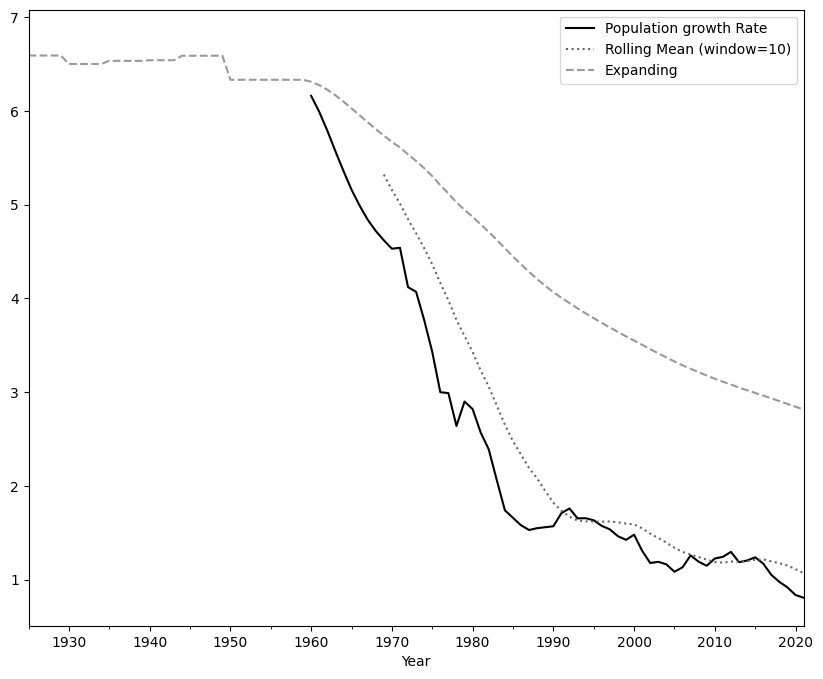

In [26]:
plt.style.use('grayscale')
plt.figure(facecolor='white')

# 年度別出生率
df['birthrate'].plot(label='Population growth Rate',
                  linestyle='-', figsize=(10,8))

# 年度別出生率を10年移動平均して、スムーズなラインを描く
df['birthrate'].rolling(window=10).mean().plot(
                 label='Rolling Mean (window=10)', linestyle=":")

# 累積平均を描く
df['birthrate'].expanding().mean().plot(label='Expanding', linestyle="--")
plt.legend()

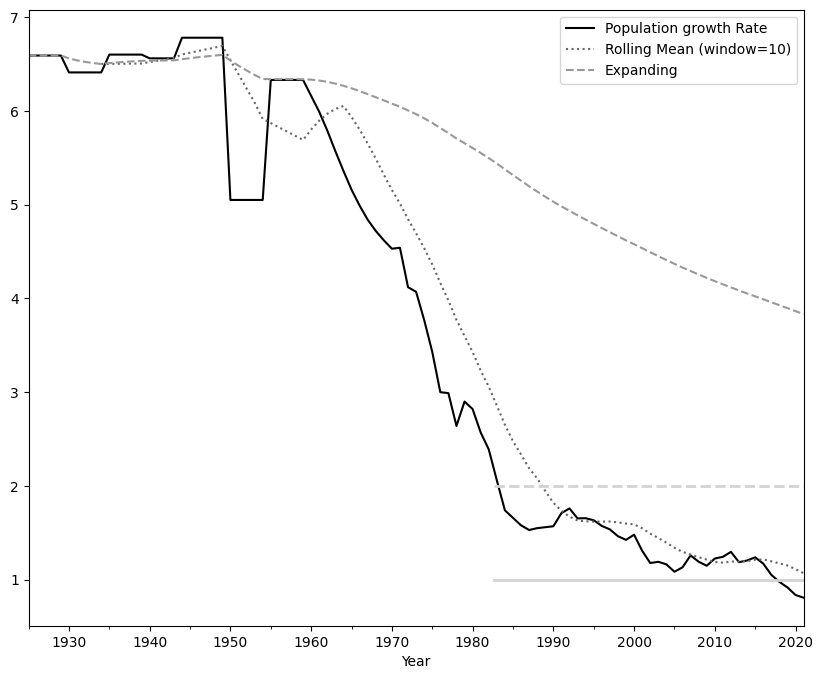

In [27]:
plt.style.use('grayscale')
plt.figure(facecolor='white')

# fillnaを用いて欠損値を埋める
# 年度別出生率
df['birthrate'].fillna(method='ffill').plot(
  label='Population growth Rate', linestyle='-', figsize=(10,8))

# 年度別出生率を10年移動平均して、スムーズなラインを描く
df['birthrate'].fillna(method='ffill').rolling(window=10).mean().plot(
                  label='Rolling Mean (window=10)', linestyle=":")

# 累積平均を描く
df['birthrate'].fillna(method='ffill').expanding().mean().plot(
                 label='Expanding', linestyle="--")

plt.axhline(y=2.0, xmin=0.6, xmax=1.0, color='lightgray',
            linestyle='--', linewidth=2)
plt.axhline(y=1.0, xmin=0.6, xmax=1.0, color='lightgray',
            linestyle='-', linewidth=2)

plt.legend()
plt.show()